In [ ]:
import os
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
from wrf import to_np, getvar, CoordPair, vertcross, latlon_coords
from scipy.ndimage import gaussian_filter
from netCDF4 import Dataset


In [7]:
filename = "/Volumes/Ann/wrf_100%/wrfout_d03_2008-03-06_23:00:00"
ncfile = Dataset(filename)# Get variables
pressure = getvar(ncfile, "slp")  # Pressure levels (hpa)
lat, lon = latlon_coords(pressure)  # Latitude and longitude
print(np.shape(lon))

(1252, 1164)


In [8]:
data_dir = '/Volumes/Ann/wrf_100%/'
file_list = sorted([f for f in os.listdir(data_dir) if f.startswith("wrfout_d03")])
file_list = file_list
file_list = file_list[16:45]
print(np.shape(file_list))
file_list

(29,)


['wrfout_d03_2008-03-06_22:00:00',
 'wrfout_d03_2008-03-06_22:15:00',
 'wrfout_d03_2008-03-06_22:30:00',
 'wrfout_d03_2008-03-06_22:45:00',
 'wrfout_d03_2008-03-06_23:00:00',
 'wrfout_d03_2008-03-06_23:15:00',
 'wrfout_d03_2008-03-06_23:30:00',
 'wrfout_d03_2008-03-06_23:45:00',
 'wrfout_d03_2008-03-07_00:00:00',
 'wrfout_d03_2008-03-07_00:15:00',
 'wrfout_d03_2008-03-07_00:30:00',
 'wrfout_d03_2008-03-07_00:45:00',
 'wrfout_d03_2008-03-07_01:00:00',
 'wrfout_d03_2008-03-07_01:15:00',
 'wrfout_d03_2008-03-07_01:30:00',
 'wrfout_d03_2008-03-07_01:45:00',
 'wrfout_d03_2008-03-07_02:00:00',
 'wrfout_d03_2008-03-07_02:15:00',
 'wrfout_d03_2008-03-07_02:30:00',
 'wrfout_d03_2008-03-07_02:45:00',
 'wrfout_d03_2008-03-07_03:00:00',
 'wrfout_d03_2008-03-07_03:15:00',
 'wrfout_d03_2008-03-07_03:30:00',
 'wrfout_d03_2008-03-07_03:45:00',
 'wrfout_d03_2008-03-07_04:00:00',
 'wrfout_d03_2008-03-07_04:15:00',
 'wrfout_d03_2008-03-07_04:30:00',
 'wrfout_d03_2008-03-07_04:45:00',
 'wrfout_d03_2008-03

In [9]:

## Load all files and extract variables in an optimized way
from tqdm import tqdm
all_slp = []
all_u=[]
all_v=[]


for file_name in tqdm(file_list):
    file_path = os.path.join(data_dir, file_name)
    try:
        with Dataset(file_path, "r") as ncfile:
            slp= getvar(ncfile,"slp")  # Geopotential height for the Mass Grid: m
            u = getvar(ncfile,"U10")  # U-component of Wind on Mass Points= Mass Grid
            v = getvar(ncfile,"V10")  # V wind component of Wind on Mass Points= Mass Grid

            all_u.append(u)
            all_v.append(v)
            all_slp.append(slp)

    # Handle specific exceptions        
    except OSError as e:
        print(f"Skipping file {file_name}: {e}")
    except Exception as e:
        print(f"An error occurred with file {file_name}: {e}")
    

np.save("set1_all_slp.npy", to_np(all_slp))
np.save("set1_all_u.npy", to_np(all_u))
np.save("set1_all_v.npy", to_np(all_v))

100%|██████████| 29/29 [08:29<00:00, 17.56s/it]


In [10]:
# check a file size for 'wrfout_d03_2008-03-07_05:00:00'
file_path = os.path.join(data_dir, 'wrfout_d03_2008-03-07_00:00:00')
file_size = os.path.getsize(file_path)
print(f"The size of '{file_path}' is {file_size} bytes.")

The size of '/Volumes/Ann/wrf_100%/wrfout_d03_2008-03-07_00:00:00' is 3958415759 bytes.


In [11]:
print(np.shape(all_slp))
print(np.shape(all_u))
print(np.shape(all_v))
print(type(all_slp))
print(type(all_u))
print(type(all_v))

(29, 1252, 1164)
(29, 1252, 1164)
(29, 1252, 1164)
<class 'list'>
<class 'list'>
<class 'list'>


In [12]:
lat_np = to_np(lat)
lon_np = to_np(lon) #Use to_np() if you are handling WRF model data stored as xarray or masked arrays.
u_np = np.array(all_u)  # Use np.array() if you are working with lists or general Python data. 
v_np = np.array(all_v)
slp_np = np.array(all_slp)

In [30]:
all_slp_filled = np.copy(slp_np)

for t in range(slp_np.shape[0]):
    all_slp_filled[t] = gaussian_filter(slp_np[t], sigma=12)


In [14]:
from datetime import datetime, timedelta
import pandas as pd

start_time = datetime(2008, 3, 6, 22, 0, 0)
end_time = datetime(2008, 3, 7, 5, 0, 0)

time_array = pd.date_range(start=start_time, end=end_time, freq="15 min")
t_plot = pd.to_datetime(time_array)
print(t_plot.shape)
t_plot

(29,)


DatetimeIndex(['2008-03-06 22:00:00', '2008-03-06 22:15:00',
               '2008-03-06 22:30:00', '2008-03-06 22:45:00',
               '2008-03-06 23:00:00', '2008-03-06 23:15:00',
               '2008-03-06 23:30:00', '2008-03-06 23:45:00',
               '2008-03-07 00:00:00', '2008-03-07 00:15:00',
               '2008-03-07 00:30:00', '2008-03-07 00:45:00',
               '2008-03-07 01:00:00', '2008-03-07 01:15:00',
               '2008-03-07 01:30:00', '2008-03-07 01:45:00',
               '2008-03-07 02:00:00', '2008-03-07 02:15:00',
               '2008-03-07 02:30:00', '2008-03-07 02:45:00',
               '2008-03-07 03:00:00', '2008-03-07 03:15:00',
               '2008-03-07 03:30:00', '2008-03-07 03:45:00',
               '2008-03-07 04:00:00', '2008-03-07 04:15:00',
               '2008-03-07 04:30:00', '2008-03-07 04:45:00',
               '2008-03-07 05:00:00'],
              dtype='datetime64[ns]', freq='15min')

In [39]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

cmap_reversed = plt.get_cmap('Spectral_r')
colorbar_label= 'SLP (hPa)'

def plot_slp_subplot(ax, t, lon, lat, data, data_u, data_v, locations, title=""):
    """
    Plot a dataset (e.g., sea level pressure) 
    """
    lat_min = 24
    lat_max = 30
    lon_min = -102
    lon_max = -95
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add geographic features
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

    # Define contour levels (adjust as needed)
    levels = np.arange(1000, 1017, 1)
    
    # Plot filled contours using the provided axis
    contour = ax.contourf(lon, lat, data, levels=levels, cmap=cmap_reversed,
                          transform=ccrs.PlateCarree(), extend='both')

    skip = 80
    ax.barbs(lon_np[::skip, ::skip], lat_np[::skip, ::skip], data_u[t, ::skip, ::skip], data_v[t, ::skip, ::skip], length=6, linewidth=1, transform=ccrs.PlateCarree())
    contour_lines = ax.contour(lon, lat, data, levels=levels, colors="black",
                               linestyle=':', linewidths=0.5, transform=ccrs.PlateCarree())


    for location, (lat_city, lon_city) in locations.items():
        # Plot markers (white filled, black border)
        ax.plot(lon_city, lat_city, marker='o', markeredgecolor='white', markeredgewidth=1.5, 
                color='black', markersize=8, transform=ccrs.PlateCarree())
        
        # Add text labels with a background for better readability
        ax.text(lon_city + 0.12, lat_city, location, transform=ccrs.PlateCarree(),
                ha='left', va='center', fontsize=10, color='black',
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.8, boxstyle='round,pad=0.3'))

    # Add gridlines with labels on the left and bottom only
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle="--")
    gl.right_labels = False
    gl.top_labels = False

    # Set the subplot title
    ax.set_title(title, fontsize=10)

    # Optionally add a colorbar if a figure is provided
    if fig is not None:
        plt.subplots_adjust(right=0.9)
        # Adjust the colorbar axis position as needed
        cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.45])
        cbar = fig.colorbar(contour, cax=cbar_ax, orientation="vertical", aspect=30, pad=0.02)
     #   cbar = fig.colorbar(contour, cax=cbar_ax, orientation="vertical")
        cbar.set_label(colorbar_label, fontsize=10)

    for spine in ax.spines.values():
        spine.set_linewidth(1)

    # Update rcParams for consistent styling (affects all plots)
    plt.rcParams.update({
        'font.size': 10,
        'font.weight': 'bold',
        'axes.labelsize': 10,
        'axes.labelweight': 'bold',
        'axes.titlesize': 14,
        'axes.titleweight': 'bold'
    })

In [16]:
# check the required timestep
file_list[8]


'wrfout_d03_2008-03-07_00:00:00'

SUBPLOTS

/Users/ananyasen/miniconda3/envs/wrf_analysis/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)
/Users/ananyasen/miniconda3/envs/wrf_analysis/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)
/Users/ananyasen/miniconda3/envs/wrf_analysis/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)
/Users/ananyasen/miniconda3/envs/wrf_analysis/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)
/Users/ananyasen/miniconda3/envs/wrf_analysis/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The

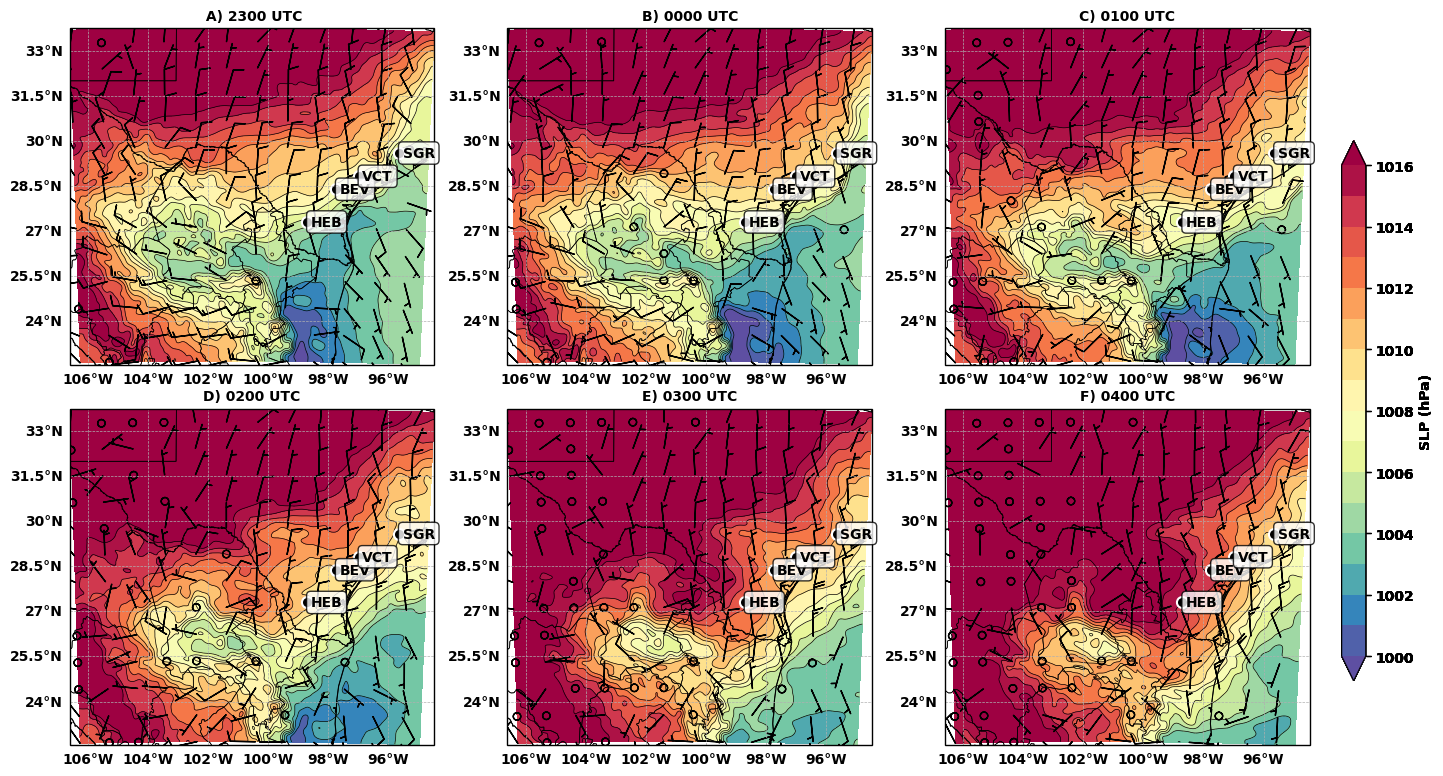

In [28]:
locations = {
    "HEB": (27.30, -98.70),
    "BEV": (28.39, -97.740),
    "VCT": (28.822003, -96.983117),
    "SGR": (29.596031, -95.640973),
}

fig, axes = plt.subplots(2, 3, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
plot_slp_subplot(axes[0, 0], 8, lon_np, lat_np, all_slp_filled[4,:,:], u_np, v_np, locations, title= " A) 2300 UTC")
plot_slp_subplot(axes[0, 1], 12, lon_np, lat_np, all_slp_filled[8,:,:], u_np, v_np, locations, title= "B) 0000 UTC")
plot_slp_subplot(axes[0, 2], 16, lon_np, lat_np, all_slp_filled[12,:,:], u_np, v_np, locations, title= "C) 0100 UTC")
plot_slp_subplot(axes[1, 0], 18, lon_np, lat_np, all_slp_filled[16,:,:], u_np, v_np, locations, title= "D) 0200 UTC")
plot_slp_subplot(axes[1, 1], 22, lon_np, lat_np, all_slp_filled[20,:,:], u_np, v_np, locations, title= "E) 0300 UTC")
plot_slp_subplot(axes[1, 2], 26, lon_np, lat_np, all_slp_filled[24,:,:], u_np, v_np, locations, title= "F) 0400 UTC")

plt.subplots_adjust(wspace=0.2, hspace=-0.3)
plt.show()

ANIMATION

In [ ]:
# check the required timestep
t = 28
file_list[t]

'wrfout_d03_2008-03-07_04:00:00'

/Users/ananyasen/miniconda3/envs/wrf_analysis/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = super().contour(*args, **kwargs)


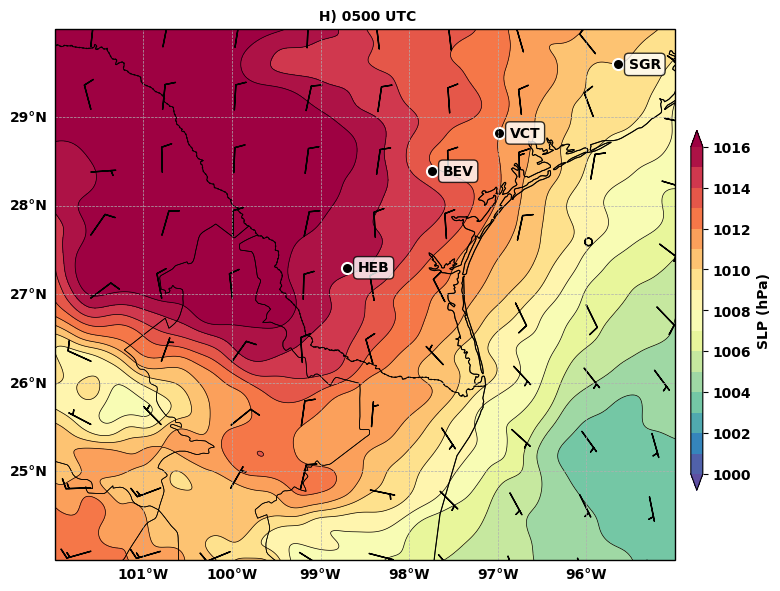

In [79]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plot_slp_subplot(ax, 8, lon_np, lat_np, all_slp_filled[t,:,:], u_np, v_np, locations, title= " H) 0500 UTC")

plt.subplots_adjust(wspace=0.2, hspace=-0.3)
plt.savefig(f'SLP_Plot_{t}_real.png', dpi=300, bbox_inches="tight")
plt.show()


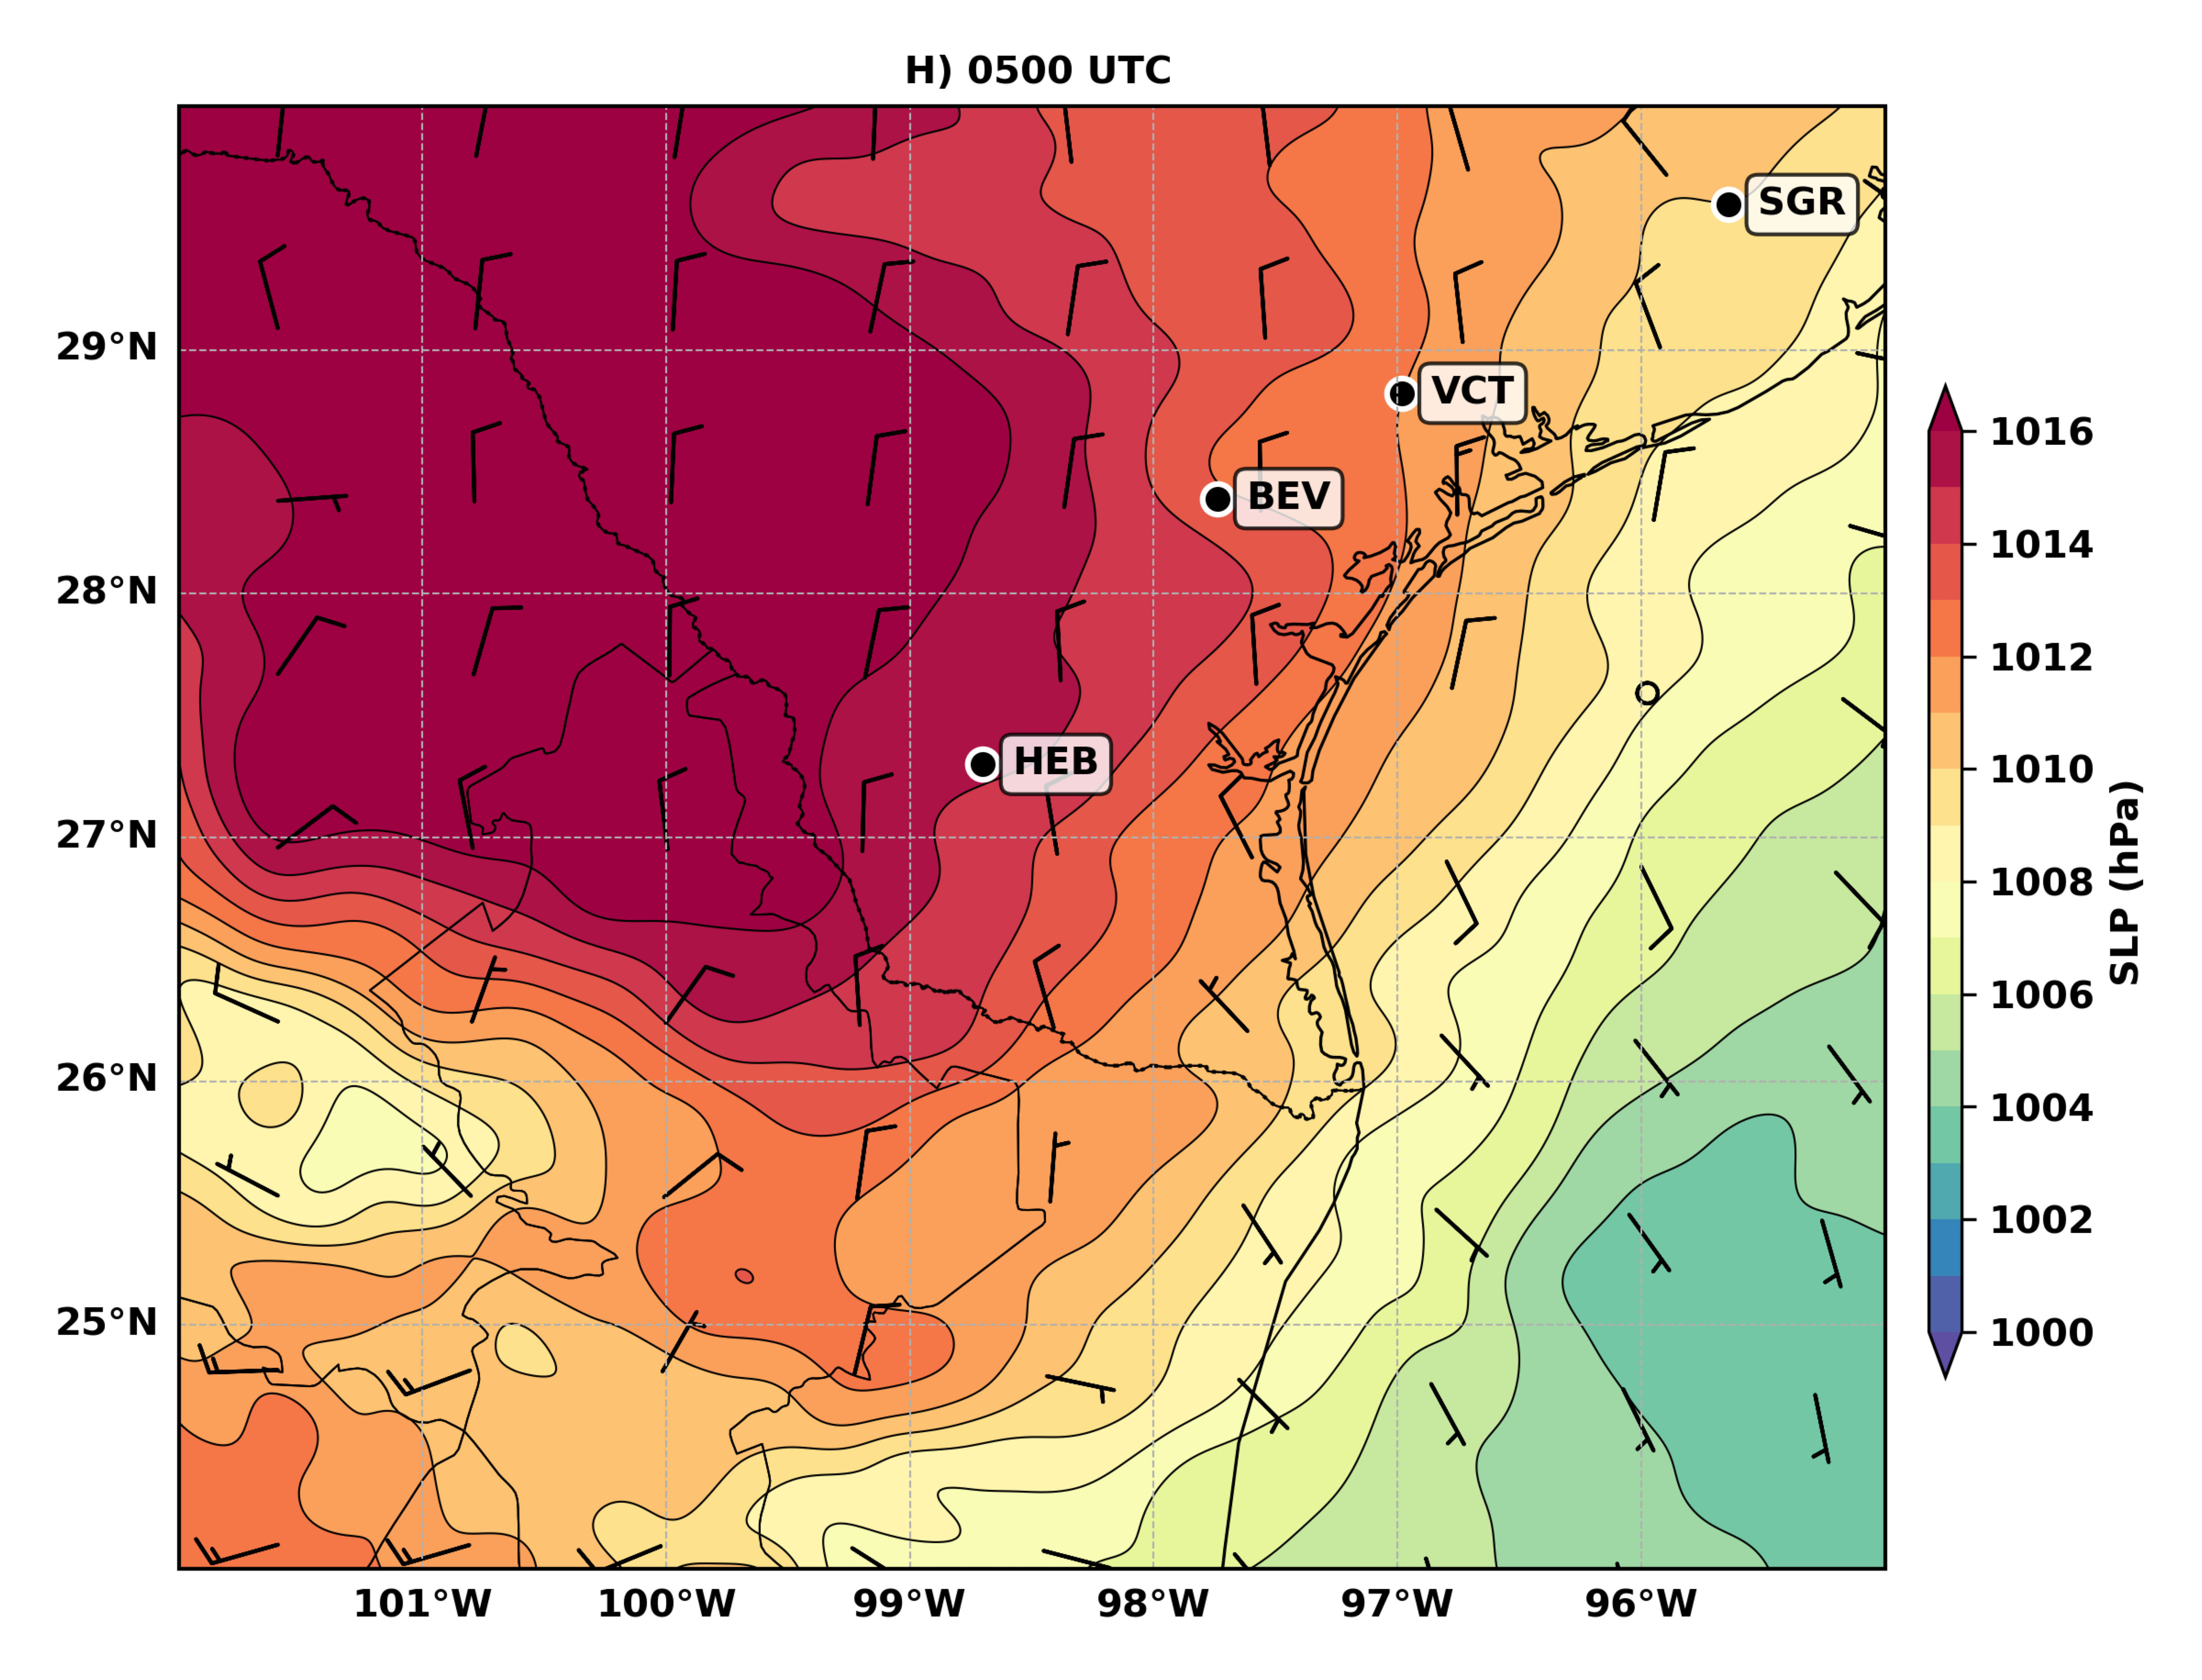

In [85]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
import os
# Define the desired order manually
order = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
base_path = "/Volumes/Ann/wrf_100%/"
image_files = [os.path.join(base_path, f"SLP_Plot_{label}_real.png") for label in order]

fig, ax = plt.subplots(figsize=(10, 8), dpi=600)  # You can tweak figsize and dpi as needed
img = plt.imread(image_files[0])
im = ax.imshow(img)
ax.set_xticks([])  
ax.set_yticks([])
ax.set_frame_on(False)  # Remove bounding box
ax.axis("off")  # Completely remove axis

def update(frame):
    im.set_array(plt.imread(image_files[frame]))
    return [im]

ani = animation.FuncAnimation(fig, update, frames=len(image_files), interval=500)
ani.save("animation_SLP_highres.gif", writer="pillow", fps=2)
plt.show()